# Image Classification Using Convolutional Neural Network (CNN)

In this notebook, we will classify small images CIFAR-10 dataset from tensorflow keras datasets.

1. There are total 10 classes as shown below. We will use CNN for classification
2. The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images. 
3. The classes are completely mutually exclusive. There is no overlap between automobiles and trucks. "Automobile" includes sedans, SUVs, things of that sort. "Truck" includes only big trucks. Neither includes pickup trucks.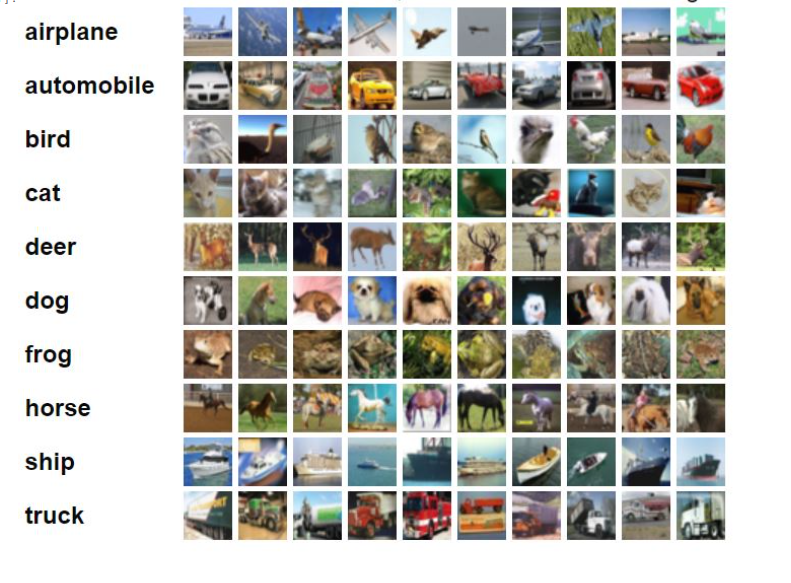 

# Overview

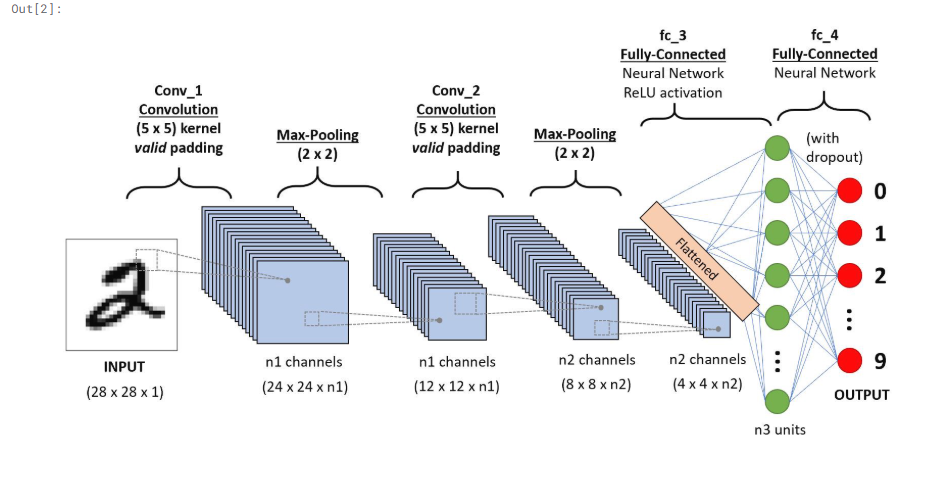
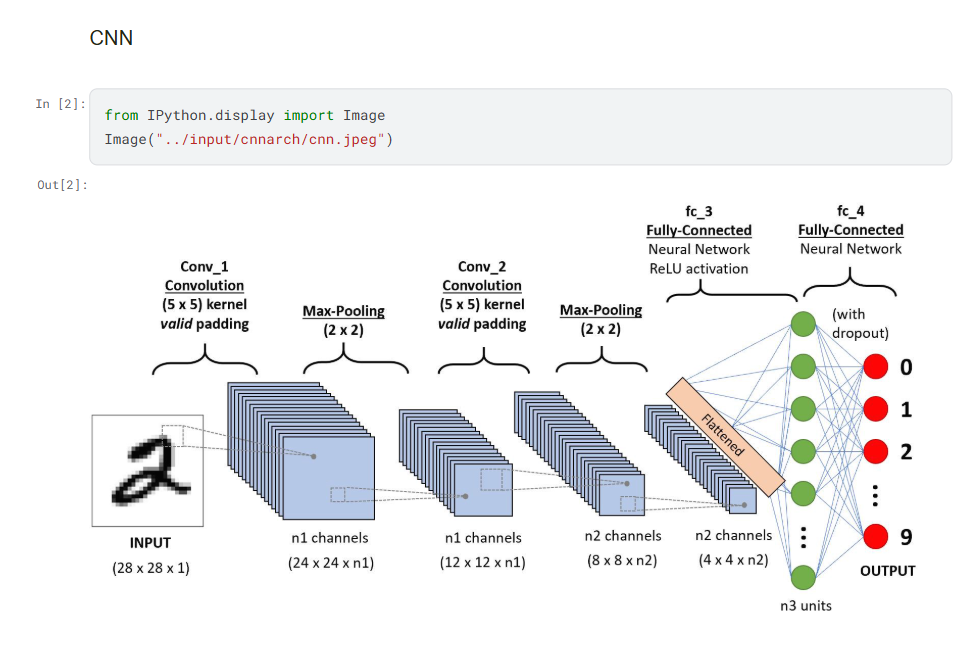

## Activation functions
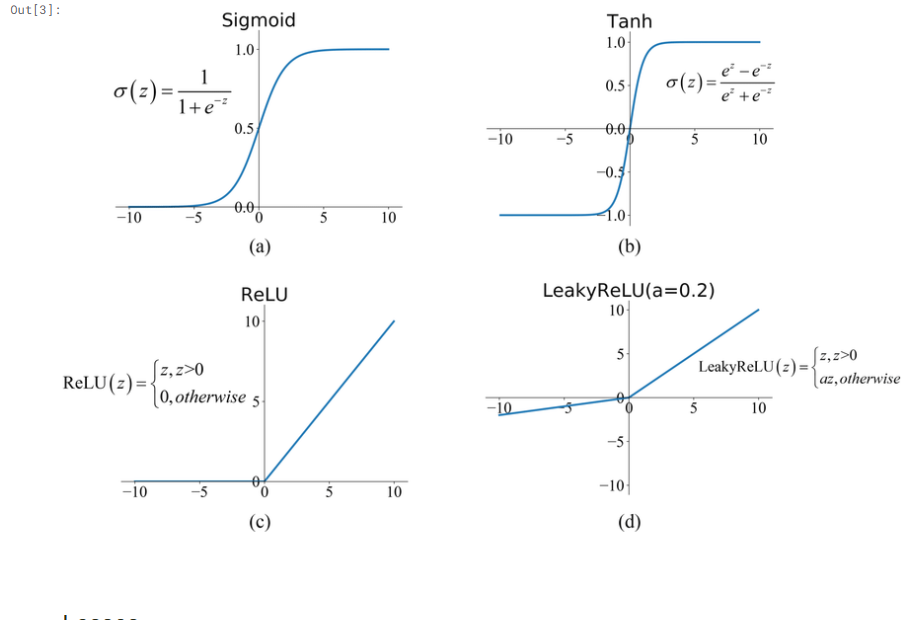

# Losses

The purpose of loss functions is to compute the quantity that a model should seek to minimize during training.

1. binary_crossentropy function
2. categorical_crossentropy function
3. sparse_categorical_crossentropy function
4. mean_squared_error function
5. mean_absolute_error function
6. mean_absolute_percentage_error function
7. mean_squared_logarithmic_error function

# 1.Import Python modules

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.preprocessing import StandardScaler

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import datasets, layers, models
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array

# 2. Load the dataset

In [2]:
(X_train, Y_train), (X_test,Y_test) = datasets.cifar10.load_data()
print("X Train:",X_train.shape)
print("X Test:", X_test.shape)
print("Y Train:",Y_train.shape)
print("Y Test:",Y_test.shape)

170508288/170498071 [==============================] - 3s 0us/step
X Train: (50000, 32, 32, 3)
X Test: (10000, 32, 32, 3)
Y Train: (50000, 1)
Y Test: (10000, 1)


**Observations**
1. Here we see there are 50000 training images and 10000 test images

In [3]:
Y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

Y_train is a 2D array, for our classification having 1D array is good enough. 
so we will convert this to now 1D array

In [4]:
Y_train = Y_train.reshape(-1,)
Y_test = Y_test.reshape(-1,)
print("Y Train:",Y_train.shape)
print("Y Test:",Y_test.shape)
Y_train[:5]

Y Train: (50000,)
Y Test: (10000,)


array([6, 9, 9, 4, 1], dtype=uint8)

In [5]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

Let's plot some images to see what they are 

In [6]:
def plot_sample(X, Y, index):
    plt.figure(figsize = (12,2))
    plt.imshow(X[index])
    plt.xlabel(classes[Y[index]])

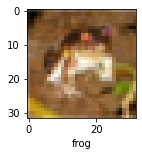

In [7]:
plot_sample(X_train, Y_train, 0)

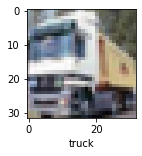

In [8]:
plot_sample(X_train, Y_train, 1)

# 3.Normalizing the training data

Normalize the images to a number from 0 to 1. Image has 3 channels (R,G,B) and each value in the channel can range from 0 to 255. Hence to normalize in 0-->1 range, we need to divide it by 255

In [9]:
X_train = X_train / 255.0
X_test = X_test / 255.0

# 4. Build simple artificial neural network for image classification

In [10]:
ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='sigmoid')    
    ])

ann.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(X_train, Y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.8873 - accuracy: 0.3334
Epoch 2/10
1563/1563 [==============================] - 4s 3ms/step - loss: 1.6641 - accuracy: 0.4038
Epoch 3/10
1563/1563 [==============================] - 4s 3ms/step - loss: 1.5838 - accuracy: 0.4316
Epoch 4/10
1563/1563 [==============================] - 4s 3ms/step - loss: 1.5362 - accuracy: 0.4499
Epoch 5/10
1563/1563 [==============================] - 4s 3ms/step - loss: 1.4963 - accuracy: 0.4631
Epoch 6/10
1563/1563 [==============================] - 4s 3ms/step - loss: 1.4692 - accuracy: 0.4740
Epoch 7/10
1563/1563 [==============================] - 4s 3ms/step - loss: 1.4395 - accuracy: 0.4850
Epoch 8/10
1563/1563 [==============================] - 4s 3ms/step - loss: 1.4177 - accuracy: 0.4917
Epoch 9/10
1563/1563 [==============================] - 4s 3ms/step - loss: 1.3953 - accuracy: 0.4994
Epoch 10/10
1563/1563 [==============================] - 4s 3ms/step - loss: 1.381

**Observations**
1. ANN - at the end of 10 epochs, accuracy is at around 50.90%

In [11]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(Y_test, y_pred_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.65      0.46      0.54      1000
           1       0.65      0.58      0.61      1000
           2       0.36      0.27      0.31      1000
           3       0.33      0.34      0.33      1000
           4       0.48      0.34      0.40      1000
           5       0.41      0.41      0.41      1000
           6       0.51      0.53      0.52      1000
           7       0.40      0.70      0.51      1000
           8       0.59      0.66      0.63      1000
           9       0.55      0.54      0.54      1000

    accuracy                           0.48     10000
   macro avg       0.49      0.48      0.48     10000
weighted avg       0.49      0.48      0.48     10000



#  5. Build a convolutional neural network 

In [12]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
cnn.summary()

history=cnn.fit(X_train, Y_train, epochs=30)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
batch_normalization (BatchNo (None, 30, 30, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
batch_normalization_1 (Batch (None, 13, 13, 64)        256       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 2304)             

**Observations**
1. With CNN, at the end 10 epochs, accuracy was at around 78.13% which is a significant improvement over ANN

In [13]:
cnn.evaluate(X_test,Y_test)

313/313 [==============================] - 1s 2ms/step - loss: 2.2063 - accuracy: 0.6820


[2.2063112258911133, 0.6819999814033508]

In [14]:
from sklearn.metrics import confusion_matrix , classification_report
y_pred = cnn.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(Y_test, y_pred_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.69      0.74      0.72      1000
           1       0.82      0.77      0.80      1000
           2       0.50      0.63      0.56      1000
           3       0.51      0.46      0.48      1000
           4       0.67      0.61      0.64      1000
           5       0.59      0.54      0.57      1000
           6       0.71      0.81      0.76      1000
           7       0.75      0.72      0.74      1000
           8       0.79      0.81      0.80      1000
           9       0.81      0.72      0.76      1000

    accuracy                           0.68     10000
   macro avg       0.69      0.68      0.68     10000
weighted avg       0.69      0.68      0.68     10000



In [15]:
y_pred = cnn.predict(X_test)
y_pred[:5]

array([[1.2438600e-10, 3.7112141e-10, 2.6640404e-08, 9.9949372e-01,
        2.3794677e-09, 3.5101253e-09, 2.2261871e-11, 1.8205819e-08,
        4.9079105e-04, 1.5503632e-05],
       [6.8875903e-01, 1.4122237e-01, 8.8227742e-10, 3.5673154e-13,
        3.3921104e-12, 1.5049162e-11, 6.4930539e-08, 5.8709350e-11,
        1.7001288e-01, 5.6905533e-06],
       [1.2350870e-04, 8.3272941e-03, 1.1145914e-02, 4.4257988e-05,
        7.4821553e-05, 3.5514910e-04, 2.6667572e-06, 2.0061912e-02,
        2.9522493e-01, 6.6463959e-01],
       [1.0000000e+00, 1.3734622e-12, 3.9636795e-18, 2.6164709e-11,
        4.4291591e-13, 1.9468605e-22, 1.0636223e-14, 3.6737644e-21,
        3.4804484e-09, 1.2819345e-13],
       [7.5886384e-13, 1.4568454e-12, 1.0205688e-03, 2.4299703e-03,
        9.8958111e-01, 1.9904375e-07, 6.9681285e-03, 1.5468902e-15,
        4.2761099e-13, 3.8922102e-13]], dtype=float32)

# 6. Predict

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  This is separate from the ipykernel package so we can avoid doing imports until


class: 0 name= airplane


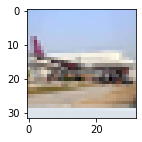

In [16]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]
from PIL import Image
fileImage = Image.open("../input/test1/test_1.jpeg").convert("RGB").resize([32,32],Image.ANTIALIAS)
image = np.array(fileImage)
myimage = image.reshape(1, 32,32,3)
# prepare pixel data
myimage = myimage.astype('float32')
myimage = myimage/255.
plt.figure(figsize = (4,2))
plt.imshow(image)

my_predicted_image = cnn.predict(myimage)
y_class = np.argmax(my_predicted_image)
print("class:",y_class,"name=",classes[y_class])

# 7. Evaluate the model

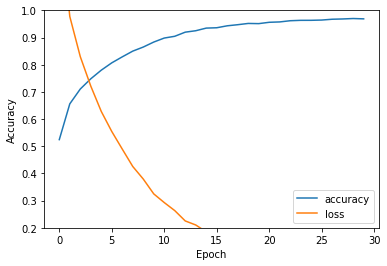

In [17]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['loss'], label = 'loss')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.2, 1])
plt.legend(loc='lower right')
plt.show()


# 8.Summary
1. ANN - at the end of 10 epochs, accuracy is at around 50.90%
2. With CNN, at the end 10 epochs, accuracy was at around 78.13% which is a significant improvement over ANN.
3. CNN - The specified input data is initially forwarded to a feature extraction network, and then the resultant extracted features are forwarded to a classifier network.